# Homework 2

Saransh Kacharia
<br>
October 15th, 2020

__1.__ Rolling a sum of $7$ is more likely than rolling snake eyes because the probability of rolling a $7$ is $\frac{6}{36} = \frac{1}{6}$ which is greater than the probability of rolling a snake eyes $\frac{1}{36}$. The ratio of the probabilities is $6:1$ which means that rolling a $7$ is six times as more likely to occur.

__2.__ The probability can be represented as a convolution of the probability density functions, $P_{A+B}(x) = \int_{z} f(z)\cdot g(x-z) \,dz$ where $f(x)$ and $g(x)$ are the probability density functions for the two dice.

To solve this analytically, we plug in $7$ and bound the integral from $1$ to $6$, we find that $P_{A+B}(7) = f(1)\cdot g(6) + f(2)\cdot g(5) + ... + f(5)\cdot g(2) + f(6)\cdot g(1) = \frac{1}{6}\cdot \frac{1}{6} + \frac{1}{6}\cdot \frac{1}{6} + ... + \frac{1}{6}\cdot \frac{1}{6} + \frac{1}{6}\cdot \frac{1}{6} = 6\cdot \frac{1}{36} = \frac{1}{6}$.

To solve this numerically, we use the convolve method in numpy on an array that represents the chance of rolling a specific number on 1 die.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


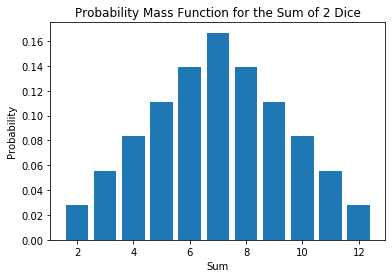

In [2]:
n = 2
dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p = np.convolve(dice, dice)
print(p)

plt.bar(np.arange(n, 6*n+1), p)
plt.title(f"Probability Mass Function for the Sum of {n} Dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.show()

The resulting array is the probability of each of the sums occuring from $2$ to $12$. Here we see that the probability of rolling a $7$ is $0.16666667 \approx \frac{1}{6}$.

__3.__ We have a distribution of probabilites for the sum of two dice. And we can find the mean and variance by doing some calculations

$\mu = \sum xp$
<br>
$Var(X) = \sum x^2p-\mu^2$

where $X$ is the distribution, $x$ is each of the values in $X$, $p$ is the probability of $x$ and $\mu$ is the mean.

In [3]:
mu = np.average(np.arange(2,13), weights=p)
print(f'Mean: {mu:.0f}')

Mean: 7


In [4]:
variance = sum(np.arange(2,13) ** 2 * p) - mu ** 2
print(f"Variance: {variance:.3f}")

Variance: 5.833


__4.__ For 10 dice, we can do the same thing as we did for 2 dice to calculate the pmf of each of the possible sums.

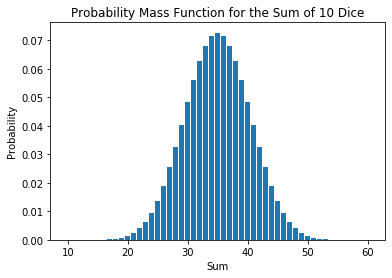

In [5]:
n = 10
dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p = np.convolve(dice, dice)
for i in range(n-2):
    p = np.convolve(p, dice)

plt.bar(np.arange(n, 6*n+1), p)
plt.title(f"Probability Mass Function for the Sum of {n} Dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.show()

The more dice that are added, the more gaussian this graph gets. Currently, it is very gaussian which can be seen by the upside down parabola on a semilog graph.

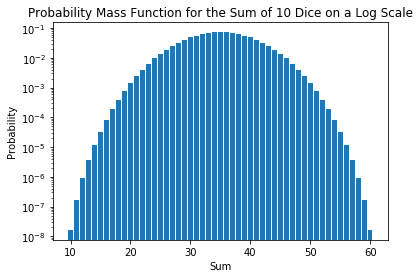

In [6]:
plt.bar(np.arange(n, 6*n+1), p)
plt.title(f"Probability Mass Function for the Sum of {n} Dice on a Log Scale")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.yscale('log')
plt.show()

__5.__ The sum of a normal distribution is also a normal distribution because for two independent variables $X$ and $Y$, the distribution $f_Z$ of $Z=X+Y$ equals the convolusion of $f_X$ and $f_Y$

$f_Z(z)=\int_{-\infty}^{\infty}f_Y(z-x)\cdot f_X(x) \,dx$

We can test this out with two gaussian distributions X and Y and see that Z is also a gaussian.

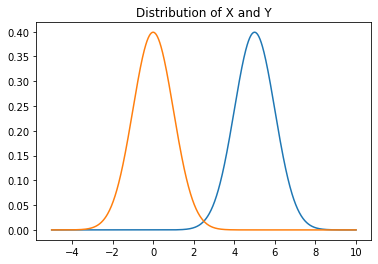

In [7]:
import scipy
from scipy import stats

x = np.linspace(-5., 10., 1000)
pdfx = stats.norm.pdf(x, loc = 5, scale = 1)

y = np.linspace(-5., 10., 1000)
pdfy = stats.norm.pdf(y, loc = 0, scale = 1)

plt.plot(x, pdfx)
plt.plot(y, pdfy)
plt.title('Distribution of X and Y')
plt.show()

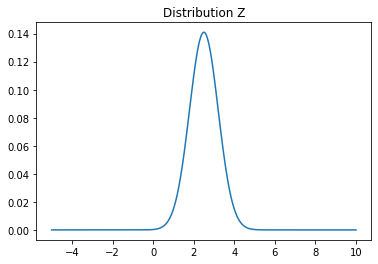

In [8]:
pdfz = np.convolve(pdfx, pdfy)
z = np.linspace(-5, 10, pdfz.size)
plt.plot(z, pdfz*(15/pdfz.size))
plt.title('Distribution Z')
plt.show()

The standard deviation of $Z$ is less than that of both $X$ and $Y$.

When more distributions are summed and averaged the standard deviation gets smaller and the gaussian distribution is narrower.

This means that when a signal is integrated over time, the longer the time period the more accurate the results because the standard deviation will be smaller.